# Web scrapping

Exemples taken from https://www.scrapingdog.com/blog/web-scraping-with-python/and from https://www.datacamp.com/tutorial/amazon-web-scraping-using-beautifulsoup

In [1]:
from bs4 import BeautifulSoup
import requests

ModuleNotFoundError: No module named 'bs4'

In [2]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
r = requests.get('https://www.abacus.coop/ca/llibres/llibres-recomanats/llibres-mes-llegits', headers=headers)
print('Status code', r.status_code)


Status code 200


In [3]:
soup = BeautifulSoup(r.text, "html.parser")

# Get the titles

titles = soup.find_all("h3")
titles = [title.text.strip() for title in titles if not title.has_attr('class')]
print(titles)


# Get the authors

authors = soup.find_all("div", class_="author-brand-wrapper")
authors = [author.text.strip() for author in authors]
print(authors)

# Get the prices

prices = []
values = soup.find_all("span", class_="sales")
for value in values:
  price = value.find("span", class_="value")
  if price:
    prices.append( price.get("content") )
print(prices)

print(len(titles), len(authors), len(prices))

['Bluey. Libro juguete - ¿Dónde está Bluey? (edición en español)', 'Cor trencat', 'Tres enigmas para la Organización', 'Titó. Excursió al fons del mar', 'BLACKWATER I. La riuada', 'Arta y Max - Superagentes secretos', 'Heartstopper 5. Creciendo contigo', 'Heartstopper 5. Sempre al teu costat', 'La cuina de la memòria', 'Todos los lugares que mantuvimos en secreto', 'BLACKWATER I. La riada', 'Casa de llama y sombra (Ciudad Medialuna 3)', "A partir d'ara", 'BLACKWATER II. El dique', 'BLACKWATER II. El dic', "Magic Animals 1. El poder de l'amulet", 'Cuando seamos sueños de papel', 'Tu cerebro tiene hambre', "El subtil art que tot t'importi una merda", 'Bona nit', "Manual de supervivència d'una dona soltera", 'Anna Kadabra 13. Peligro en la mansión', 'Las hijas de la criada', 'Powerless']
['Bluey', 'Blay, Pep', 'Mendoza, Eduardo', 'Jiménez Carbó, Cristina', 'McDowell, Michael', 'Game, Arta', 'Oseman, Alice', 'Oseman, Alice', 'Paré Vidal, Anna', 'Rubiales, Inma', 'McDowell, Michael', 'Maas,

In [4]:
books = {}
books["title"] = titles
books["author"] = authors
books["price"] = prices

import pandas as pd
df = pd.DataFrame( books )
df.to_csv('books.csv', index=False)
df.to_json('books.json')
df.to_xml('books.xml', index=False)

In [ ]:
%%bash
head books.csv
head books.json
head books.xml

title,author,price
Bluey. Libro juguete - ¿Dónde está Bluey? (edición en español),Bluey,14.20
Cor trencat,"Blay, Pep",22.80
Tres enigmas para la Organización,"Mendoza, Eduardo",20.80
Titó. Excursió al fons del mar,"Jiménez Carbó, Cristina",11.35
BLACKWATER I. La riuada,"McDowell, Michael",9.40
Arta y Max - Superagentes secretos,"Game, Arta",17.05
Heartstopper 5. Creciendo contigo,"Oseman, Alice",15.15
Heartstopper 5. Sempre al teu costat,"Oseman, Alice",15.15
El sutil arte de que (casi todo) te importe una mierda,"Manson, Mark",16.05
{"title":{"0":"Bluey. Libro juguete - \u00bfD\u00f3nde est\u00e1 Bluey? (edici\u00f3n en espa\u00f1ol)","1":"Cor trencat","2":"Tres enigmas para la Organizaci\u00f3n","3":"Tit\u00f3. Excursi\u00f3 al fons del mar","4":"BLACKWATER I. La riuada","5":"Arta y Max - Superagentes secretos","6":"Heartstopper 5. Creciendo contigo","7":"Heartstopper 5. Sempre al teu costat","8":"El sutil arte de que (casi todo) te importe una mierda","9":"La cuina de la mem\u00f2ri

In [5]:
df['price'] = pd.to_numeric(df['price'])
df_sorted_desc = df.sort_values(by='price', ascending=False)
print(df_sorted_desc[:5])

                                          title            author  price
1                                   Cor trencat         Blay, Pep  22.80
22                       Las hijas de la criada   Ónega, Sonsoles  21.75
23                                    Powerless   Roberts, Lauren  20.85
11  Casa de llama y sombra (Ciudad Medialuna 3)    Maas, Sarah J.  20.85
2             Tres enigmas para la Organización  Mendoza, Eduardo  20.80


In [7]:
# Import libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file, output_notebook
from bokeh.models import ColumnDataSource

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(df)

# Create the figure
p = figure(title="Book Prices", x_axis_label="Book Title", y_axis_label="Price")

# Create circles to represent data points
p.circle(x="title", y="price", source=source, size=10, color="darkorange")

# Display the plot on a jupyter notebook (output_file() for .html)
output_notebook()
show(p)


ColumnDataSource(id='p1048', ...)


## Homework

1. From the book list in Abacus, which is the book with the higher discount?
2. Do the same analysis with another book shop like <https://www.waterstones.com/books/bestsellers>. I do not recomment Amazon.
3. If you do not like books, you may do this analysis with any similar webpage with a listing (e.g. <https://www.ssa.gov/oact/babynames/>).


# Basic analysis: Data Features

In [3]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = iris.target

# If we want to convert integers to floats to make data uniform
iris.target.astype(float)

print(iris_df.columns)

#iris_df = iris_df.rename({'sepal length (cm)' : 'sl', 'sepal width (cm)' : 'sw', 'petal length (cm)' : 'pl', 'petal width (cm)' : 'pw'})
iris_df.columns = ['sl', 'sw', 'pl', 'pw', 'target']

print(iris_df)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
      sl   sw   pl   pw  target
0    5.1  3.5  1.4  0.2       0
1    4.9  3.0  1.4  0.2       0
2    4.7  3.2  1.3  0.2       0
3    4.6  3.1  1.5  0.2       0
4    5.0  3.6  1.4  0.2       0
..   ...  ...  ...  ...     ...
145  6.7  3.0  5.2  2.3       2
146  6.3  2.5  5.0  1.9       2
147  6.5  3.0  5.2  2.0       2
148  6.2  3.4  5.4  2.3       2
149  5.9  3.0  5.1  1.8       2

[150 rows x 5 columns]


Chi-squared test
NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)
NormaltestResult(statistic=3.1238322481520377, pvalue=0.2097338099298262)
NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)
NormaltestResult(statistic=137.55596543193647, pvalue=1.3492785927137586e-30)
Shapiro test
ShapiroResult(statistic=0.9760902723490532, pvalue=0.010181161454691156)
ShapiroResult(statistic=0.9849178695056319, pvalue=0.10115426916130282)
ShapiroResult(statistic=0.8762680554631075, pvalue=7.412263135173186e-10)
ShapiroResult(statistic=0.9018349381915991, pvalue=1.680465210314913e-08)


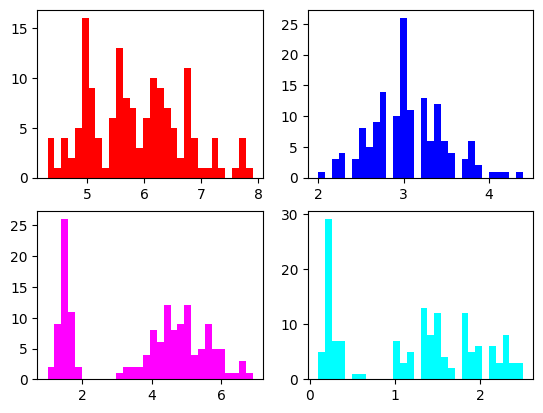

In [4]:
import matplotlib.pyplot as plt
import scipy

# Let's create four histograms, one for every feature

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
normal_tests = []
shapiro_tests = []

# Let's select all rows and the first columns: iris_df.iloc[:,0]

number_of_bins = 30
ax0.hist(iris_df['sl'], number_of_bins, color='red')

# Let's check if it fits in a normal distribution
# The function normaltest returns the p value of chi-square distribution
# and correlation
# If p > 0.05, the data may follow a normal distribution

normal_tests += [scipy.stats.normaltest(iris_df.iloc[:,0], axis=0)]

# We can check with other methods like Shapiro-Wilk or Anderson-Darling
# As before, if p > 0.05, the data may follow a normal distribution

shapiro_tests += [scipy.stats.shapiro(iris_df.iloc[:,0])]

# The same for the rest of features

ax1.hist(iris_df.iloc[:,1], number_of_bins, color='blue')
normal_tests += [scipy.stats.normaltest(iris_df.iloc[:,1], axis=0)]
shapiro_tests += [scipy.stats.shapiro(iris_df.iloc[:,1])]

ax2.hist(iris_df.iloc[:,2], number_of_bins, color='magenta')
normal_tests += [scipy.stats.normaltest(iris_df.iloc[:,2], axis=0)]
shapiro_tests += [scipy.stats.shapiro(iris_df.iloc[:,2])]

ax3.hist(iris_df.iloc[:,3], number_of_bins, color='cyan')
normal_tests += [scipy.stats.normaltest(iris_df.iloc[:,3], axis=0)]
shapiro_tests += [scipy.stats.shapiro(iris_df.iloc[:,3])]

print('Chi-squared test')
for nt in normal_tests:
  print(nt)

print("Shapiro test")
for st in shapiro_tests:
  print(st)


target
0    50
1    50
2    50
Name: count, dtype: int64


<Axes: ylabel='count'>

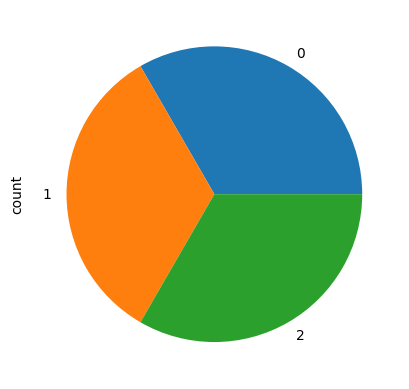

In [5]:
# Distribution of categories

print(iris_df.target.value_counts())
iris_df.target.value_counts().plot(kind='pie')

In [6]:
# Central tendency analysis

print(iris_df.iloc[:,0].mean())
print(iris_df.iloc[:,0].median())

# Dispersion tendency analysis

print(iris_df.iloc[:,0].std())
print(iris_df.iloc[:,0].quantile())

## Percentiles in extremes
print(iris_df.iloc[:,0].quantile([0.25,0.75]))

## The description contains these information for each column:

# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile.
# 50% - The 50% percentile.
# 75% - The 75% percentile.
# max - the maximum value.

print("Description")
print(iris_df.iloc[:,0].describe()) # All these values
#print("Only upper percentile")
#print(iris_df.iloc[:,0].describe(percentiles=[.25, .75])) # Only the upper percentile

for i in range(4):
  print('Feature ', i, ':', iris_df.iloc[:,i].quantile())

5.843333333333334
5.8
0.828066127977863
5.8
0.25    5.1
0.75    6.4
Name: sl, dtype: float64
Description
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sl, dtype: float64
Feature  0 : 5.8
Feature  1 : 3.0
Feature  2 : 4.35
Feature  3 : 1.3


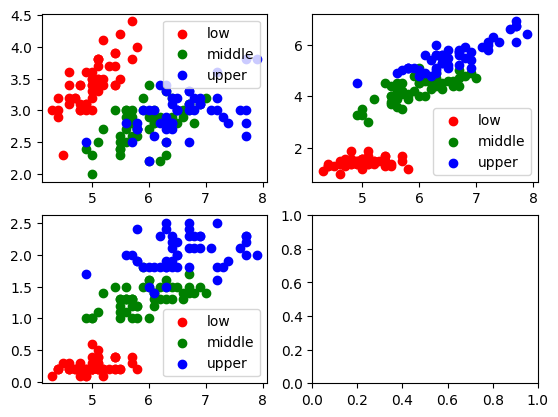

In [7]:
# Correlation analysis

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.scatter(iris_df.iloc[:,0][:50], iris_df.iloc[:,1][:50], color = 'red', label='low')
ax0.scatter(iris_df.iloc[:,0][50:100], iris_df.iloc[:,1][50:100], color = 'green', label='middle')
ax0.scatter(iris_df.iloc[:,0][100:], iris_df.iloc[:,1][100:], color = 'blue', label='upper')
ax0.legend(loc='best')

ax1.scatter(iris_df.iloc[:,0][:50], iris_df.iloc[:,2][:50], color = 'red', label='low')
ax1.scatter(iris_df.iloc[:,0][50:100], iris_df.iloc[:,2][50:100], color = 'green', label='middle')
ax1.scatter(iris_df.iloc[:,0][100:], iris_df.iloc[:,2][100:], color = 'blue', label='upper')
ax1.legend(loc='best')

ax2.scatter(iris_df.iloc[:,0][:50], iris_df.iloc[:,3][:50], color = 'red', label='low')
ax2.scatter(iris_df.iloc[:,0][50:100], iris_df.iloc[:,3][50:100], color = 'green', label='middle')
ax2.scatter(iris_df.iloc[:,0][100:], iris_df.iloc[:,3][100:], color = 'blue', label='upper')
ax2.legend(loc='best')


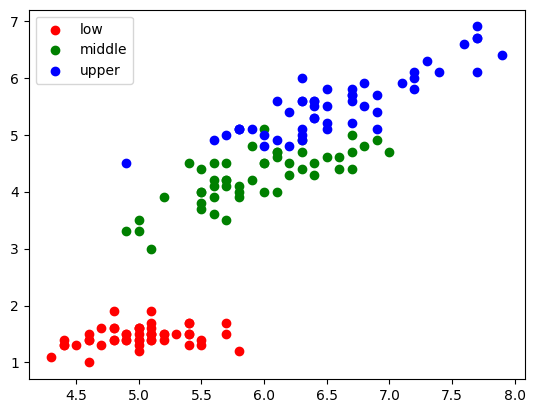

In [14]:
# Correlation analysis

from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = [item[0] for item in iris.data]
Y = [item[2] for item in iris.data]

plt.scatter(X[:50], Y[:50], color = 'red', label='low')
plt.scatter(X[50:100], Y[50:100], color = 'green', label='middle')
plt.scatter(X[100:], Y[100:], color = 'blue', label='upper')
plt.legend(loc='best')


Pearson correlation coefficient
Variables contínues
Quan les variables son independents i en una distribució normal

$$ r_x = \frac{\sum (X-\bar X)}{\sqrt{\sum (X-\bar X)^2}}$$

r > 0 : positive linear correlation, change in a variable make changes in the other in the same direction
r < 0 : correlation in the oposite direction
r = 0 : no correlation
r = 1 : complete linear correlation

In general: > 0.5 : correlation, > 0.8 : high correlation, < 0.3 : no correlation

In [16]:
print(iris_df.iloc[:,[0,1,4]].corr()) # Correlation between vars 0 and 1 and output
print(iris_df['target'].corr(iris_df.iloc[:,0])) # Correlation between target and var 0

              sl        sw    target
sl      1.000000 -0.117570  0.782561
sw     -0.117570  1.000000 -0.426658
target  0.782561 -0.426658  1.000000
0.7825612318100819


<Axes: >

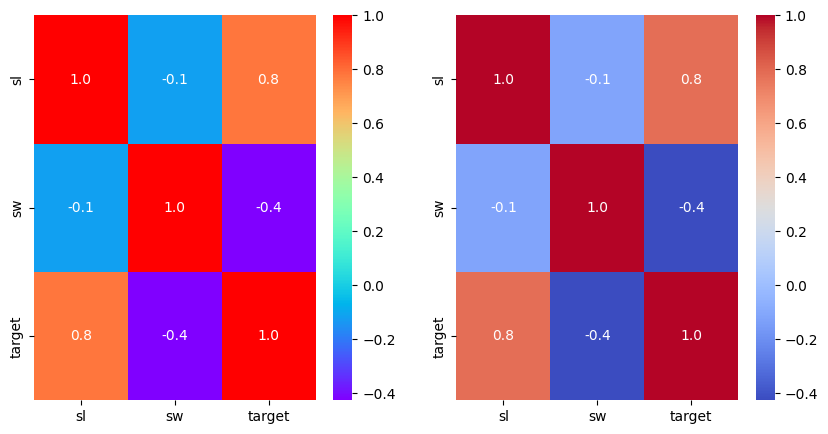

In [17]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.heatmap(iris_df.iloc[:,[0,1,4]].corr(), ax=axes[0], annot=True, fmt='.1f', cmap='rainbow')
sns.heatmap(iris_df.iloc[:,[0,1,4]].corr(), ax=axes[1], annot=True, fmt='.1f', cmap='coolwarm')

## Homework

1. Do the same analysis with another tabular dataset, like [Abalone](https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset), [Prima Indians Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) or [Titanic](https://www.kaggle.com/c/titanic/data) datasets.

# Basic cleansing: Data Imputation

On imputers: <https://medium.com/@blant.jesse/imputing-missing-values-with-the-new-knnimputer-and-iterativeimputer-methods-110270738c4#:~:text=The%20two%20most%20popular%20models,the%20missing%20values%20with%20the>

In [19]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


<https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py>

California Housing dataset large with 20640 entries and 8 features. We will only use the first 300 entries for the sake of speeding up the calculations.


In [20]:
import numpy as np
from sklearn.datasets import fetch_california_housing

# Let's add missing values

# Container for the Mersenne Twister pseudo-random number generator.
seed = 12345
rng = np.random.RandomState(seed)

# Only fetch 300 rows
X_california, y_california = fetch_california_housing(return_X_y=True)
X_california = X_california[:300]
y_california = y_california[:300]

# Let's select the rows and the columns
n_samples, n_features = X_california.shape
missing_samples = np.random.choice([True, False], size=n_samples, p=[0.75, 0.25])
missing_features = rng.randint(0, n_features, np.sum(missing_samples == True)) # low, high, size

# We fix the selected row,column to NaN
X_miss_california = X_california.copy()
X_miss_california[missing_samples, missing_features] = np.nan
y_miss_california = y_california.copy()


In [21]:
# Now we will write a function which will score the results on the differently imputed data
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

california_stats = []

# In addition to imputing the missing values, the imputers have an add_indicator
# parameter that marks the values that were missing, which might carry some information.

def get_scores_for_imputer(imputer, X_missing, y_missing, num_folds=4):
    regressor = RandomForestRegressor(random_state=0)
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=num_folds
    )
    return impute_scores.mean(), impute_scores.std()

In [22]:
# First, we want to estimate the score on the original data:

def get_full_score(X_full, y_full, num_folds=4):
    regressor = RandomForestRegressor(random_state=0)
    full_scores = cross_val_score(
        regressor, X_full, y_full, scoring="neg_mean_squared_error", cv=num_folds
    )
    return full_scores.mean(), full_scores.std()

mean, std = get_full_score(X_california, y_california)
california_stats.append( (mean, std, "Full data") )

In [23]:
# Now we will estimate the score on the data where the missing values are replaced by 0:

def get_impute_zero_score(X_missing, y_missing):
    imputer = SimpleImputer(
        missing_values=np.nan, add_indicator=True, strategy="constant", fill_value=0
    )
    return get_scores_for_imputer(imputer, X_missing, y_missing)

mean, std = get_impute_zero_score(X_miss_california, y_miss_california)
california_stats.append( (mean, std, "Zero Imputation") )

In [24]:
# KNNImputer imputes missing values using the weighted or unweighted mean of the desired number of nearest neighbors.

def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    return get_scores_for_imputer(imputer, X_missing, y_missing)

mean, std = get_impute_knn_score(X_miss_california, y_miss_california)
california_stats.append( (mean, std, "KNN Imputation") )


In [25]:
def get_impute_mean(X_missing, y_missing):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)
    return get_scores_for_imputer(imputer, X_missing, y_missing)

mean, std = get_impute_mean(X_miss_california, y_miss_california)
california_stats.append( (mean, std, "Mean Imputation") )

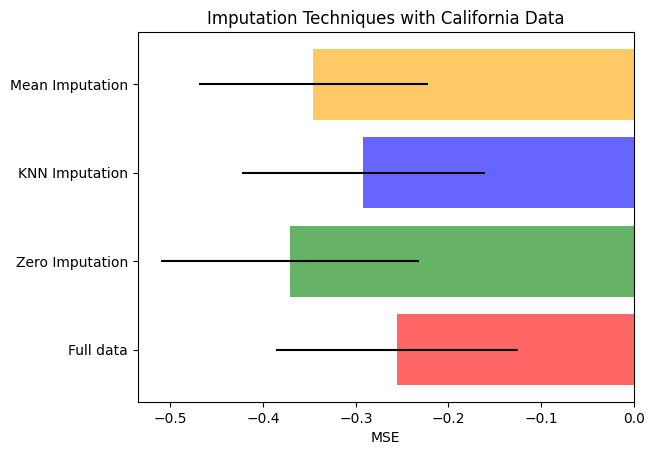

In [36]:
# Finally we are going to visualize the score:

import matplotlib.pyplot as plt

colors = ["r", "g", "b", "orange", "black"]

for x, stats in enumerate(california_stats):
    plt.barh(x, stats[0], xerr=stats[1], color=colors[x], alpha=0.6, align="center")

plt.title("Imputation Techniques with California Data")
plt.yticks(range( len(california_stats) ), [x[2] for x in california_stats])
plt.xlabel("MSE")

plt.show()

## Homework

1. Do the same analysis with the Diabetes Dataset. `from sklearn.datasets import load_diabetes`

2. Try also with another imputer: `IterativeImputer`
